In [525]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as ms

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from datetime import datetime
from sklearn.preprocessing import StandardScaler

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [526]:
data = pd.read_csv('train.csv')
data.shape

(1460, 81)

In [527]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Cleaning Data

In [528]:
cols_null =round((data.isnull().sum()/len(data)*100),2).sort_values(ascending=False)
cols_null.loc[cols_null != 0]

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

#### Checking for null values

In [529]:
cols_null_values= list(cols_null.loc[cols_null >80].index)
print(len(cols_null_values))

4


In [530]:
data= data.drop(cols_null_values, axis=1)
data= data.drop(['Id'], axis=1)
data.shape

(1460, 76)

In [531]:
data_categorical=data.select_dtypes(include=['object'])
data.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500


In [532]:
null_value =round((data_categorical.isnull().sum()/len(data_categorical)*100),2)
null_value.loc[null_value != 0]

MasVnrType       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
dtype: float64

In [533]:
data_categorical['MasVnrType'].astype('category').value_counts()


None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [534]:
data_categorical.MasVnrType.unique()


array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [535]:
data_categorical['MasVnrType'] =data_categorical['MasVnrType'].fillna("NoMasVnrType", inplace = False) 
data_categorical['BsmtQual'] =data_categorical['BsmtQual'].fillna("NoBsmtQual", inplace = False) 
data_categorical['BsmtCond']=data_categorical['BsmtCond'].fillna("NoBsmtCond", inplace = False) 
data_categorical['BsmtExposure']=data_categorical['BsmtExposure'].fillna("NoBsmtExposure", inplace = False) 
data_categorical['BsmtFinType1']=data_categorical['BsmtFinType1'].fillna("NoBsmtFinType1", inplace = False) 
data_categorical['BsmtFinType2']=data_categorical['BsmtFinType2'].fillna("NoBsmtFinType2", inplace = False) 
data_categorical['Electrical']=data_categorical['Electrical'].fillna("NoElectrical", inplace = False) 
data_categorical['GarageType']=data_categorical['GarageType'].fillna("NoGarageType", inplace = False) 
data_categorical['GarageFinish']=data_categorical['GarageFinish'].fillna("NoGarageFinihs", inplace = False) 
data_categorical['GarageQual']=data_categorical['GarageQual'].fillna("NoGarageQual", inplace = False) 
data_categorical['GarageCond']=data_categorical['GarageCond'].fillna("NoGarageCond", inplace = False) 

In [536]:
data_categorical['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', 'NoMasVnrType'], dtype=object)

In [537]:
data_numerical=data.select_dtypes(include=['int64','float64'])

null_value= round((data_numerical.isnull().sum()/len(data_numerical)*100),2)
null_value.loc[null_value != 0]

LotFrontage    17.74
MasVnrArea      0.55
GarageYrBlt     5.55
dtype: float64

In [538]:
data_numerical=data.select_dtypes(include=['int64','float64'])

null_value= round((data_numerical.isnull().sum()/len(data_numerical)*100),2)
null_value.loc[null_value != 0]

LotFrontage    17.74
MasVnrArea      0.55
GarageYrBlt     5.55
dtype: float64

In [539]:
null_value= round((data_numerical.isnull().sum()/len(data_numerical)*100),2)
null_value.loc[null_value != 0]

LotFrontage    17.74
MasVnrArea      0.55
GarageYrBlt     5.55
dtype: float64

In [540]:
categorical_col= list(data_categorical.columns)


In [541]:
data= data.drop(categorical_col, axis=1)


In [542]:
data_categorical.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   LotShape       1460 non-null   object
 3   LandContour    1460 non-null   object
 4   Utilities      1460 non-null   object
 5   LotConfig      1460 non-null   object
 6   LandSlope      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   Condition1     1460 non-null   object
 9   Condition2     1460 non-null   object
 10  BldgType       1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  RoofStyle      1460 non-null   object
 13  RoofMatl       1460 non-null   object
 14  Exterior1st    1460 non-null   object
 15  Exterior2nd    1460 non-null   object
 16  MasVnrType     1460 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

In [543]:
final_df=pd.concat([data,data_categorical],axis=1)


In [544]:
null_value= round((final_df.isnull().sum()/len(final_df)*100),2)
null_value.loc[null_value != 0]

LotFrontage    17.74
MasVnrArea      0.55
GarageYrBlt     5.55
FireplaceQu    47.26
dtype: float64

In [545]:
final_df['GarageYrBlt']= final_df['GarageYrBlt'].fillna(0, inplace=False)


In [546]:
null_value= round((final_df.isnull().sum()/len(final_df)*100),2)
null_value.loc[null_value != 0]

LotFrontage    17.74
MasVnrArea      0.55
FireplaceQu    47.26
dtype: float64

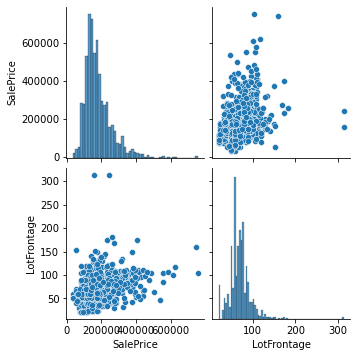

In [547]:
sns.pairplot(final_df[['SalePrice','LotFrontage']])


In [548]:
final_df['LotFrontage'] = final_df['LotFrontage'].fillna(final_df['LotFrontage'].median())


In [549]:
null_value= round((final_df.isnull().sum()/len(final_df)*100),2)
null_value.loc[null_value != 0]

MasVnrArea      0.55
FireplaceQu    47.26
dtype: float64

In [550]:
final_df['MasVnrArea'] = final_df['MasVnrArea'].fillna(final_df['MasVnrArea'].median())


#### Preparing data

<AxesSubplot:>

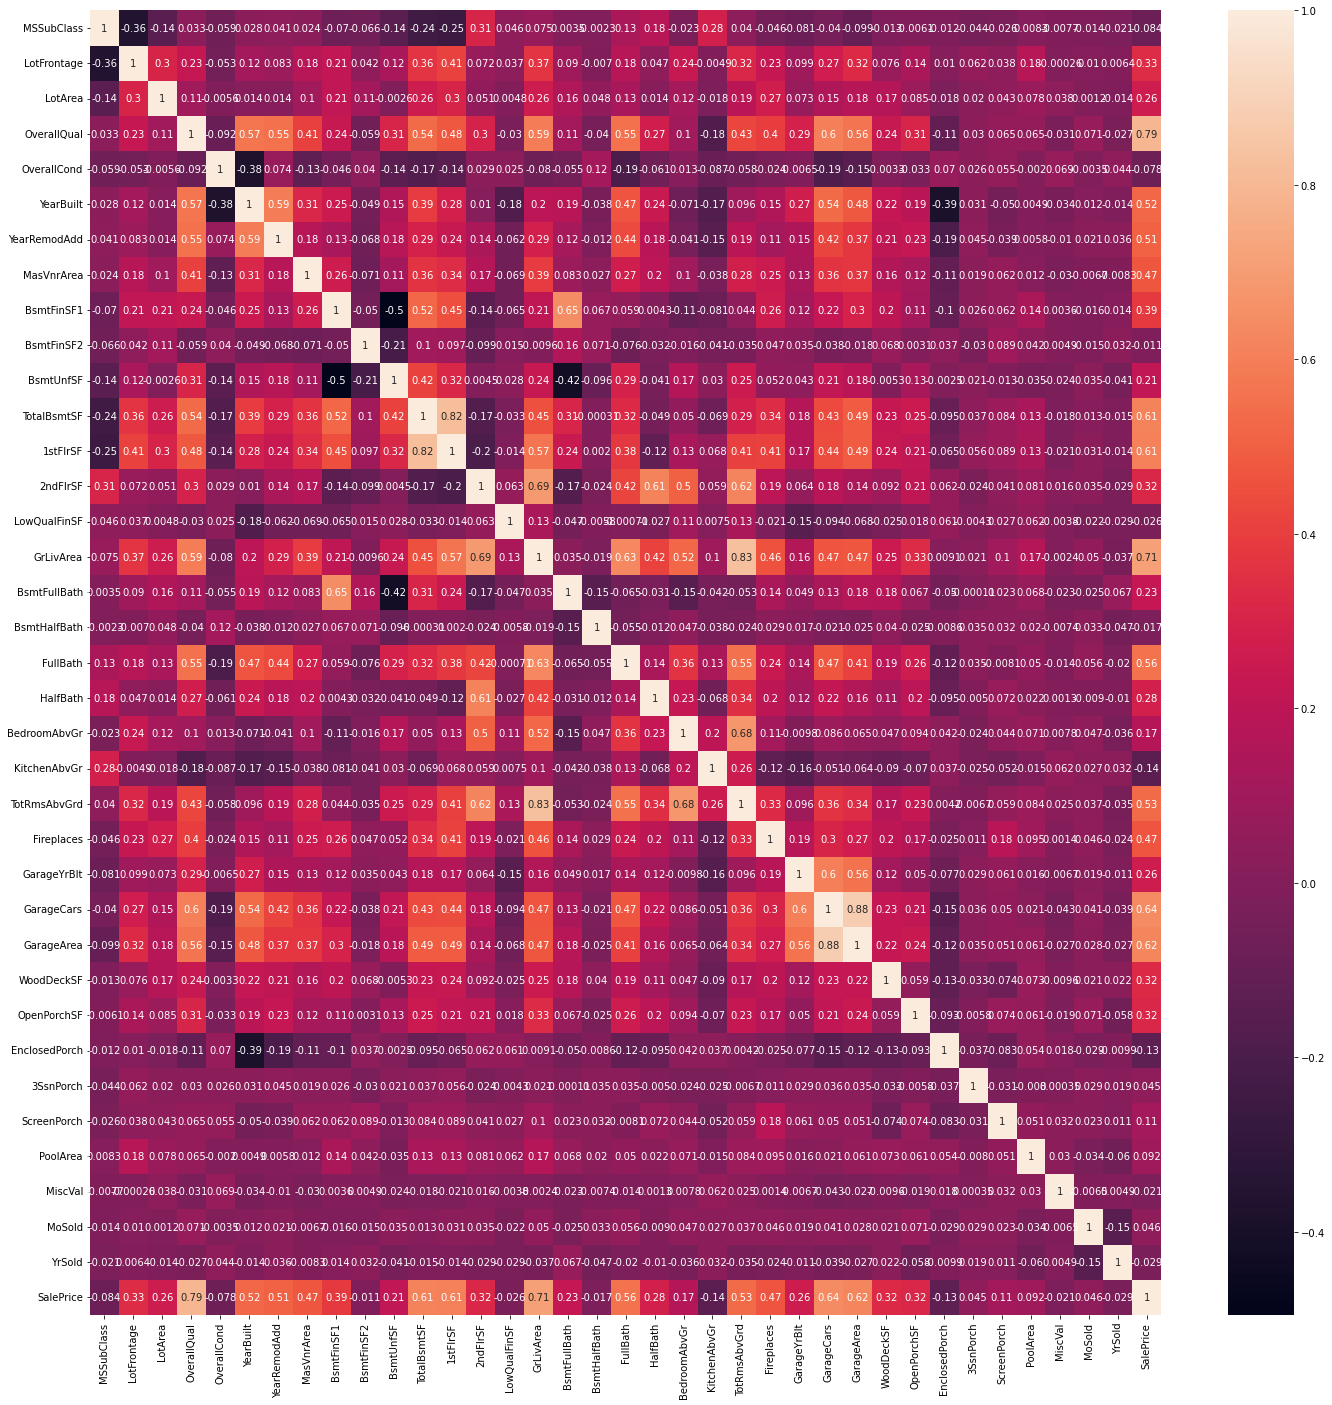

In [551]:
plt.figure(figsize=(24, 24))
sns.heatmap(final_df.corr(), annot = True)

In [552]:
#highly correlated varaibles
corr_matrix = final_df.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
col_to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.80)]
col_to_drop

['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea']

In [553]:
final_df= final_df.drop(col_to_drop, axis=1)

#### Features and dummies

In [554]:
final_df['CurrentYear'] = datetime.now().year
final_df["Age"] = final_df['CurrentYear'] - final_df['YearBuilt']
final_df.drop(['CurrentYear', 'YearBuilt'], axis = 1, inplace = True)

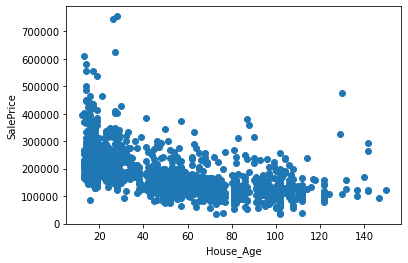

In [555]:
plt.scatter(x=final_df['Age'], y=final_df['SalePrice'])
plt.xlabel("House_Age"); plt.ylabel("SalePrice")
plt.show()

In [556]:
NonNumCols = []
NumCols = []

for col in list(final_df):
    if final_df[col].dtypes == 'object':
        NonNumCols.append(col)  
    else:
        NumCols.append(col)
print('Non-Numerical columns:\n',NonNumCols)

print('Numerical columns:\n',NumCols)

Non-Numerical columns:
 ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
Numerical columns:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Mis

In [557]:
df_dummy = pd.get_dummies(final_df[NonNumCols], drop_first=True)

In [558]:
df_concat = pd.concat([final_df, df_dummy], axis=1)
df_concat.shape

(1460, 284)

In [559]:
df_final = df_concat.drop(NonNumCols, axis = 1)
df_final.shape

(1460, 245)

#### Test train split & Scaling

In [560]:
X = df_final.drop('SalePrice', axis=1)
y = df_final['SalePrice']

In [561]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1021, 244)
X_test Shape: (438, 244)
y_train Shape: (1021,)
y_test Shape: (438,)


In [562]:
scaler = StandardScaler()
#Scaling the numerical columns
NumCols1 = NumCols.copy()
NumCols1.remove('SalePrice')
X_train[NumCols1] = scaler.fit_transform(X_train[NumCols1])
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,-0.657071,-0.115302,-0.473765,-0.779861,0.383154,-1.694350,-0.558025,0.043512,-0.293313,-0.374367,...,0,0,0,0,1,0,0,0,1,0
318,0.035976,0.926898,-0.056845,0.649651,-0.533005,0.390956,0.809137,1.160345,-0.293313,-0.454644,...,0,0,0,0,1,0,0,0,1,0
239,-0.195040,-0.794998,-0.169324,-0.065105,-1.449164,-1.694350,-0.558025,-0.761296,-0.293313,0.171964,...,0,0,0,0,1,0,0,0,1,0
986,-0.195040,-0.477806,-0.502297,-0.065105,2.215472,0.875911,-0.558025,-0.963574,-0.293313,-0.175904,...,0,0,0,0,1,0,0,0,1,0
1416,3.039179,-0.432493,0.082905,-1.494617,0.383154,-1.694350,-0.558025,-0.963574,-0.293313,0.475233,...,0,0,0,0,1,0,0,0,1,0


In [563]:
X_test[NumCols1] = scaler.transform(X_test[NumCols1])
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,-0.888086,-0.432493,-0.144189,-1.494617,0.383154,-0.675945,-0.558025,0.361992,-0.293313,-0.704396,...,0,0,0,0,1,0,0,0,1,0
57,0.035976,0.881585,0.112505,0.649651,-0.533005,0.924407,-0.558025,-0.963574,-0.293313,0.660317,...,0,0,0,0,1,0,0,0,1,0
780,-0.888086,-0.296554,-0.253368,0.649651,-0.533005,0.536443,-0.355087,-0.963574,-0.293313,1.500998,...,0,0,0,0,1,0,0,0,1,0
382,0.035976,0.428455,-0.120412,0.649651,-0.533005,1.021398,-0.558025,-0.963574,-0.293313,0.836481,...,0,0,0,0,1,0,0,0,1,0
1170,0.498007,0.292515,-0.058786,-0.065105,0.383154,-0.384972,-0.558025,0.159714,-0.293313,0.022559,...,0,0,0,0,1,0,0,0,1,0


#### Model Building

##### Ridge

In [564]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [565]:
ridge_reg=ms.GridSearchCV(ridge, param_grid=params, scoring='neg_mean_squared_error', cv=15)
ridge_reg.fit(X_train,y_train)
print(f"The best value of Alpha is: {ridge_reg.best_params_}")

The best value of Alpha is: {'alpha': 20}


In [566]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020740,0.003552,0.009382,0.001857,0.0001,{'alpha': 0.0001},-18652.557186,-20633.167764,-20624.867090,-21219.182409,...,-19903.270466,1153.231643,16,-11812.473102,-11473.690780,-11971.952759,-12104.264370,-11565.887774,-11785.653757,237.721393
1,0.018714,0.003951,0.007848,0.001157,0.001,{'alpha': 0.001},-18597.002984,-20619.733915,-20580.651868,-21094.067847,...,-19844.439610,1144.730604,15,-11815.182787,-11473.955585,-11963.971213,-12100.144794,-11570.450472,-11784.740970,234.536875
2,0.021173,0.002376,0.009019,0.002250,0.01,{'alpha': 0.01},-18433.135132,-20506.861116,-20482.237301,-20146.110896,...,-19527.394340,1056.342278,12,-11956.076609,-11477.265711,-12043.399577,-12131.888273,-11746.668267,-11871.059688,234.737039


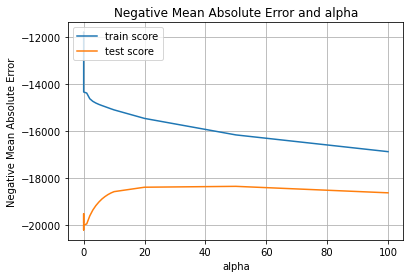

In [567]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.grid()
plt.show()

In [568]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-7.31830360e+03, -2.53239619e+03,  3.91308354e+03,  1.64811994e+04,
        5.37106422e+03,  2.32341653e+03,  4.34602113e+03,  3.18208689e+02,
        1.21328044e+03,  1.82061092e+03,  2.55278719e+03,  9.17353469e+03,
       -1.58363346e+03,  2.22305568e+04,  5.38319503e+03,  6.96176186e+02,
        3.78321728e+03,  9.16077349e+02, -9.41864965e+02, -2.66792127e+03,
        3.85868634e+03, -2.80713021e+03,  1.02171909e+04,  2.14053760e+03,
       -7.55147172e+02,  6.08942761e+02,  1.53824236e+03,  1.32877697e+03,
       -6.80049187e+02, -1.53560682e+02, -6.98665294e+02, -1.24912366e+03,
       -5.35877924e+03,  3.09102356e+03,  1.54614342e+03,  4.69062127e+03,
       -2.57313539e+03,  3.78239986e+03,  1.42211611e+03, -8.02987933e+03,
        4.49883533e+02,  6.95553215e+03,  4.66911331e+03,  1.05126395e+04,
       -1.73679012e+03,  7.20943033e+03, -6.24634789e+03, -1.40846345e+03,
       -1.23554867e+03,  5.63085180e+03, -1.28605836e+03, -5.26722775e+02,
       -1.04230345e+01,  

In [569]:
### Lasso

In [570]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [571]:
lasso_reg=ms.GridSearchCV(lasso, param_grid=params, scoring='neg_mean_squared_error', cv=15)
lasso_reg.fit(X_train,y_train)

print(f'The best value of Alpha is: {lasso_reg.best_params_}')

The best value of Alpha is: {'alpha': 100}


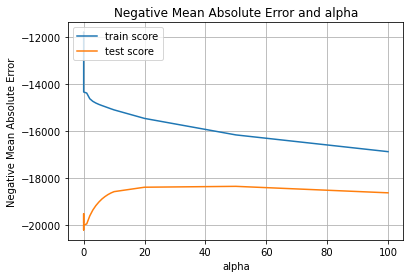

In [572]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.grid()
plt.show()

In [573]:
alpha =100

lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [574]:
lasso.coef_

array([-7.82034849e+03, -2.18742171e+03,  4.02308624e+03,  1.42618335e+04,
        5.54123763e+03,  2.17176591e+03,  3.23879088e+03, -0.00000000e+00,
        9.23374291e+02,  9.01437872e+02,  1.91559667e+03,  7.29241991e+03,
       -1.99090932e+03,  2.62102619e+04,  5.12041240e+03,  6.47578443e+02,
        3.26225344e+03,  0.00000000e+00, -1.49220660e+03, -3.21994553e+03,
        1.81619403e+03, -2.74640419e+03,  8.95196479e+03,  1.51672065e+03,
       -0.00000000e+00,  4.88316901e+02,  1.18010590e+03,  1.13746372e+03,
       -8.21665437e+02, -6.41554566e+01, -4.50714020e+02, -9.09192980e+02,
       -6.61745780e+03,  0.00000000e+00,  0.00000000e+00,  5.82131058e+03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.78961866e+04,
        3.49007532e+02,  6.29474671e+03,  6.54822542e+03,  1.01791377e+04,
       -0.00000000e+00,  8.72011822e+03, -5.71339407e+03, -0.00000000e+00,
       -0.00000000e+00,  2.09755738e+03,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [575]:
y_pred_ridge_train = ridge.predict(X_train)
y_pred_lasso_train = lasso.predict(X_train)

Error distribution in train dataset


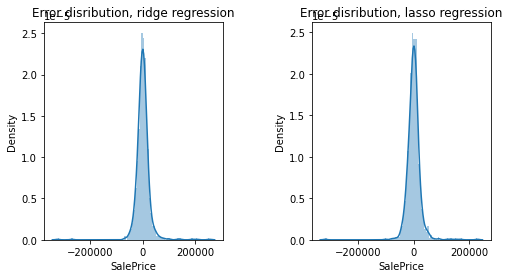

In [576]:
print('Error distribution in train dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_train - y_pred_ridge_train), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_train - y_pred_lasso_train), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [577]:
print('r2_score in train dataset')
print('r2_score for ridge:', r2_score(y_train, y_pred_ridge_train))
print('r2_score for lasso:', r2_score(y_train, y_pred_lasso_train))

r2_score in train dataset
r2_score for ridge: 0.8848579725119533
r2_score for lasso: 0.9029119518981455


In [578]:
y_pred_ridge_test = ridge.predict(X_test)
y_pred_lasso_test = lasso.predict(X_test)

Error distribution in test dataset


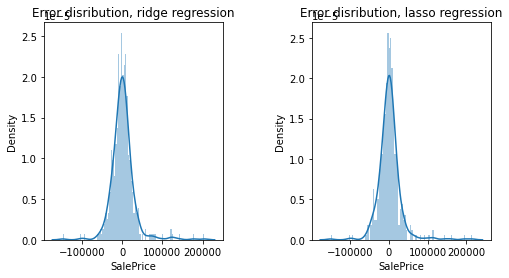

In [579]:
print('Error distribution in test dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_pred_ridge_test), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_pred_lasso_test), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

In [580]:
print('r2_score in train dataset:')
print('r2_score for ridge:', round(r2_score(y_train, y_pred_ridge_train), 2))
print('r2_score for lasso:', round(r2_score(y_train, y_pred_lasso_train), 2))
print('\n')
print('r2_score in test dataset:')
print('r2_score for ridge:', round(r2_score(y_test, y_pred_ridge_test), 2))
print('r2_score for lasso:', round(r2_score(y_test, y_pred_lasso_test), 2))

r2_score in train dataset:
r2_score for ridge: 0.88
r2_score for lasso: 0.9


r2_score in test dataset:
r2_score for ridge: 0.87
r2_score for lasso: 0.86


In [581]:
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = list(zip(cols, model_parameters))
var_coeff

[('constant', 168465.679),
 ('MSSubClass', -7820.348),
 ('LotFrontage', -2187.422),
 ('LotArea', 4023.086),
 ('OverallQual', 14261.834),
 ('OverallCond', 5541.238),
 ('YearRemodAdd', 2171.766),
 ('MasVnrArea', 3238.791),
 ('BsmtFinSF1', -0.0),
 ('BsmtFinSF2', 923.374),
 ('BsmtUnfSF', 901.438),
 ('TotalBsmtSF', 1915.597),
 ('2ndFlrSF', 7292.42),
 ('LowQualFinSF', -1990.909),
 ('GrLivArea', 26210.262),
 ('BsmtFullBath', 5120.412),
 ('BsmtHalfBath', 647.578),
 ('FullBath', 3262.253),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -1492.207),
 ('KitchenAbvGr', -3219.946),
 ('Fireplaces', 1816.194),
 ('GarageYrBlt', -2746.404),
 ('GarageCars', 8951.965),
 ('WoodDeckSF', 1516.721),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', 488.317),
 ('3SsnPorch', 1180.106),
 ('ScreenPorch', 1137.464),
 ('PoolArea', -821.665),
 ('MiscVal', -64.155),
 ('MoSold', -450.714),
 ('YrSold', -909.193),
 ('Age', -6617.458),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 5821.311),
 ('MSZoning_RM', -0.0),
 ('S

In [582]:
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
var_coeff

[('constant', 168465.679),
 ('MSSubClass', -7820.348),
 ('LotFrontage', -2187.422),
 ('LotArea', 4023.086),
 ('OverallQual', 14261.834),
 ('OverallCond', 5541.238),
 ('YearRemodAdd', 2171.766),
 ('MasVnrArea', 3238.791),
 ('BsmtFinSF2', 923.374),
 ('BsmtUnfSF', 901.438),
 ('TotalBsmtSF', 1915.597),
 ('2ndFlrSF', 7292.42),
 ('LowQualFinSF', -1990.909),
 ('GrLivArea', 26210.262),
 ('BsmtFullBath', 5120.412),
 ('BsmtHalfBath', 647.578),
 ('FullBath', 3262.253),
 ('BedroomAbvGr', -1492.207),
 ('KitchenAbvGr', -3219.946),
 ('Fireplaces', 1816.194),
 ('GarageYrBlt', -2746.404),
 ('GarageCars', 8951.965),
 ('WoodDeckSF', 1516.721),
 ('EnclosedPorch', 488.317),
 ('3SsnPorch', 1180.106),
 ('ScreenPorch', 1137.464),
 ('PoolArea', -821.665),
 ('MiscVal', -64.155),
 ('MoSold', -450.714),
 ('YrSold', -909.193),
 ('Age', -6617.458),
 ('MSZoning_RL', 5821.311),
 ('LotShape_IR3', -17896.187),
 ('LotShape_Reg', 349.008),
 ('LandContour_HLS', 6294.747),
 ('LandContour_Low', 6548.225),
 ('LandContour_Lvl

In [583]:
len(var_coeff)

110

In [584]:
final_var_list = []
for i in list(final_df):
    for j in var_coeff:
        if i in j[0]:
            final_var_list.append(i)
            break
print(final_var_list)
print(len(final_var_list))

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'SaleType', 'SaleCondition', 'Age']
63


In [585]:
#variables with positive coefficients
pos_var = [x for x in var_coeff if x[-1] > 0]
final_var_pos = []
for i in list(data):
    for j in pos_var:
        if i in j[0]:
            final_var_pos.append(i)
            break
print(final_var_pos)
print(len(final_var_pos))


['LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
20


In [586]:
#variables with negative coefficients
neg_var = [x for x in var_coeff if x[-1] < 0]
final_var_neg = []
for i in list(data):
    for j in neg_var:
        if i in j[0]:
            final_var_neg.append(i)
            break
print(final_var_neg )
print(len(final_var_neg))

['MSSubClass', 'LotFrontage', 'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageYrBlt', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
10


In [587]:
#### Alpha Value

In [588]:
alpha = 40 
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
y_pred_ridge_train = ridge.predict(X_train)
y_pred_ridge_test = ridge.predict(X_test)
ridgecoef= pd.Series(ridge.coef_,index= X_train.columns)
ridge_var_selected= sum(ridgecoef != 0)
print('Ridge has selected {} varibales'.format(ridge_var_selected))

#best variables predicing housing prices as per ridge Regression
ridge_main_coef= pd.concat([ridgecoef.sort_values().head(10), ridgecoef.sort_values().tail(10)])
ridge_main_coef.sort_values(ascending= False)

Ridge has selected 240 varibales


GrLivArea               20471.913906
OverallQual             17369.801038
Neighborhood_NoRidge    16503.567660
Neighborhood_NridgHt    14341.881870
BsmtExposure_Gd         11471.403936
GarageCars              10453.251436
Condition1_Norm          9779.471781
Neighborhood_Crawfor     9469.656393
2ndFlrSF                 8329.014857
RoofMatl_WdShngl         7438.652736
Neighborhood_Mitchel    -6433.372392
MSSubClass              -7071.285596
Condition2_PosN         -7212.924079
ExterQual_TA            -7730.285010
BsmtExposure_No         -8504.590556
BsmtQual_TA             -8995.091856
KitchenQual_TA          -9963.568612
Neighborhood_Edwards   -11718.943625
KitchenQual_Gd         -12348.086892
BsmtQual_Gd            -16201.071866
dtype: float64

In [589]:
alpha =200
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

y_pred_lasso_train = lasso.predict(X_train)
y_pred_lasso_test = lasso.predict(X_test)


lassocoef= pd.Series(lasso.coef_,index= X_train.columns)
lasso_var_selected= sum(lassocoef != 0)
print('Lasso has selected {} varibales'.format(lasso_var_selected))
#best variables predicing housing prices as per ridge Regression
lasso_main_coef= pd.concat([lassocoef.sort_values().head(10), lassocoef.sort_values().tail(10)])
lasso_main_coef.sort_values(ascending= False)

Lasso has selected 83 varibales


Neighborhood_NoRidge     40349.525195
RoofMatl_WdShngl         26815.216124
Neighborhood_NridgHt     26308.842407
GrLivArea                24534.342218
Neighborhood_Crawfor     20468.905039
BsmtExposure_Gd          18331.300068
OverallQual              16524.385879
Neighborhood_Somerst     16127.151716
Condition1_Norm          12397.182002
Exterior1st_BrkFace      12147.724899
Exterior2nd_Stucco       -6358.047782
MSSubClass               -6955.642827
BsmtExposure_No          -7288.388321
Age                      -7799.245277
BsmtQual_TA             -10785.886034
Neighborhood_Edwards    -13399.731773
KitchenQual_TA          -18073.283716
BsmtQual_Gd             -20118.530518
KitchenQual_Gd          -20423.916106
Condition2_PosN        -100929.586339
dtype: float64

In [590]:
print('r2_score for ridge:')
print('Train dataset:', round(r2_score(y_train, y_pred_ridge_train), 2))
print('Test dataset:', round(r2_score(y_test, y_pred_ridge_test), 2))

print('\n')

print('r2_score for lasso:')
print('Train dataset:', round(r2_score(y_train, y_pred_lasso_train), 2))
print('Test dataset:', round(r2_score(y_test, y_pred_lasso_test), 2))

r2_score for ridge:
Train dataset: 0.87
Test dataset: 0.86


r2_score for lasso:
Train dataset: 0.89
Test dataset: 0.86
